In [4]:
import blackhc.notebook

Switched to directory C:\Users\black\PycharmProjects\feldman
%load_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%autoreload 2


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
%matplotlib inline

In [7]:
data = pd.read_csv('input/german_processed.csv')

In [99]:
data = pd.read_csv('input/german_repaired.csv')

In [100]:
data.describe()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.369000,2479.248000,3.109000,2.975000,35.840000,1.401000,1.155000,1.300000
std,5.494272,754.790563,0.912113,0.922619,11.508381,0.555435,0.362086,0.458487
min,11.000000,1377.000000,2.000000,2.000000,19.000000,1.000000,1.000000,1.000000
25%,15.000000,1858.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2330.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,21.000000,3063.750000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,36.000000,4057.000000,4.000000,4.000000,75.000000,3.000000,2.000000,2.000000


In [101]:
one_hot_data = pd.get_dummies(data)

In [102]:
one_hot_data.dtypes

month                              int64
credit_amount                      int64
investment_as_income_percentage    int64
residence_since                    int64
age                                int64
number_of_credits                  int64
people_liable_for                  int64
credit                             int64
status_A11                         uint8
status_A12                         uint8
status_A13                         uint8
status_A14                         uint8
credit_history_A30                 uint8
credit_history_A31                 uint8
credit_history_A32                 uint8
credit_history_A33                 uint8
credit_history_A34                 uint8
purpose_A40                        uint8
purpose_A41                        uint8
purpose_A410                       uint8
purpose_A42                        uint8
purpose_A43                        uint8
purpose_A44                        uint8
purpose_A45                        uint8
purpose_A46     

In [103]:
from sklearn import linear_model

In [104]:
logistic = linear_model.LogisticRegression()


In [105]:
age_X = one_hot_data[one_hot_data.columns.difference(['credit', 'sex_male', 'sex_female'])]

In [106]:
age_Y = one_hot_data['sex_male']

In [107]:
logistic.fit(age_X, age_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
logistic.predict(age_X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [120]:
logistic.score(age_X, age_Y)

0.731

In [109]:
p1 = np.matmul(age_X, logistic.coef_.T) - logistic.intercept_

In [119]:
logistic.intercept_

array([-0.18420355])

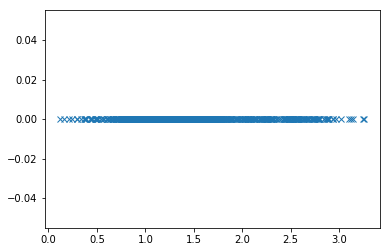

In [110]:
plt.plot(p1, np.zeros_like(p1), 'x')

In [111]:
p_rest = age_X - logistic.coef_ * p1 / np.linalg.norm(logistic.coef_)**2

In [117]:
np.matmul(p_rest, logistic.coef_.T) # Sanity check

array([[-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0.18420355],
       [-0

In [113]:
from sklearn import decomposition

In [114]:
pca = decomposition.PCA(1)

In [115]:
p2 = pca.fit_transform(p_rest) 

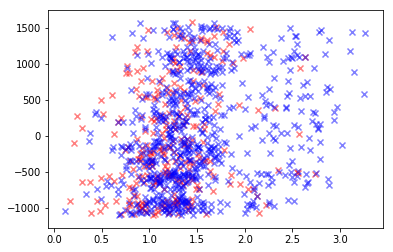

In [116]:
for mask, color in zip([age_Y==0, age_Y==1], ['r', 'b']):
    plt.scatter(p1[mask], p2[mask], c=color, alpha=0.5, marker='x')
plt.show()

In [121]:
np.count_nonzero(age_Y==0)

271

In [122]:
np.count_nonzero(age_Y==1)

729

In [126]:
1-271/(271+729.0)

0.729

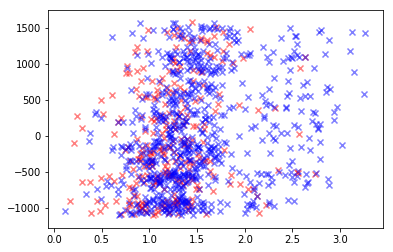

In [127]:
for mask, color in zip([age_Y==0, age_Y==1], ['r', 'b']):
    plt.scatter(p1[mask], p2[mask], c=color, alpha=0.5, marker='x')
plt.show()

In [128]:
logistic_1 = linear_model.LogisticRegression()
logistic_1.fit(X, target)

logistic_2 = linear_model.LogisticRegression()
logistic_2.fit(X, target2)

NameError: name 'X' is not defined

In [129]:
logistic.coef_.shape

(1, 57)

In [138]:
X = np.hstack([logistic.coef_.T, logistic.coef_.T])

In [139]:
np.linalg.qr(X)

(array([[-2.90732126e-03,  9.82320080e-01],
        [-1.57266990e-04,  1.20487947e-04],
        [ 1.21046052e-02,  2.36658159e-03],
        [ 8.48944672e-02,  2.35783835e-02],
        [-3.07154571e-02,  1.08675194e-02],
        [ 2.99570611e-02, -1.76553759e-02],
        [ 4.00444157e-02, -2.58426034e-02],
        [ 3.89891412e-02, -1.15904113e-02],
        [ 1.40440475e-01, -1.02913013e-01],
        [ 2.37198934e-02,  5.05137947e-03],
        [-3.39539058e-02,  2.40770355e-02],
        [-3.29105119e-02,  2.82410453e-02],
        [ 1.80290167e-01,  3.40165662e-02],
        [-4.40050748e-02, -1.75092423e-03],
        [ 2.39118185e-01,  3.58047362e-02],
        [-4.83761895e-02, -1.14596824e-02],
        [-5.44569029e-02,  1.20729769e-04],
        [ 5.48119573e-02, -2.52421411e-02],
        [ 1.45768157e-02, -7.69413497e-04],
        [ 6.68963192e-02, -4.77236444e-02],
        [-1.05528201e-01,  1.74110828e-02],
        [ 4.83103045e-03, -3.26127255e-03],
        [-1.59170057e-01,  6.997